In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file=r'chinancoron2020.csv'
coro=pd.read_csv(file)

In [3]:
coro.head()

,date,determined,Inc_deter,undetermined,death
0,1/16/2020,4,4,0,2
1,1/17/2020,62,58,0,2
2,1/18/2020,121,59,0,3
3,1/19/2020,198,77,0,4
4,1/20/2020,291,93,54,6


In [4]:
coro.tail()

,date,determined,Inc_deter,undetermined,death
19,2/4/2020,24363,3892,23260,491
20,2/5/2020,28060,3697,24702,564
21,2/6/2020,31211,3151,26359,637
22,2/7/2020,34598,3401,27657,723
23,2/8/2020,37251,2657,28942,812


In [5]:
coro['date'] =  pd.to_datetime(coro['date']) #, format='%d%b%Y:%H:%M:%S.%f')

In [6]:
coro.tail()

,date,determined,Inc_deter,undetermined,death
19,2020-02-04,24363,3892,23260,491
20,2020-02-05,28060,3697,24702,564
21,2020-02-06,31211,3151,26359,637
22,2020-02-07,34598,3401,27657,723
23,2020-02-08,37251,2657,28942,812


In [7]:
coro.set_index('date', inplace=True)

In [8]:
coro.index

DatetimeIndex(['2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
               '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08'],
              dtype='datetime64[ns]', name='date', freq=None)

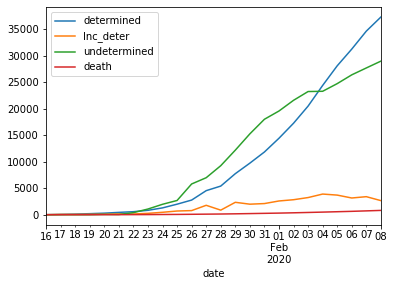

In [9]:
coro.plot() #color='b',linestyle='--',marker='o')

### Using the data of daily increasing determined cases in China from Jan 21 through Jan 30 to build the Deep learning model 

In [10]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import keras as K

Using TensorFlow backend.


In [11]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back): #-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


det=coro['determined'].to_list()
  

inc_det=[]
inc_det.append(4)
for i in range(1,len(det)):
    inc_det.append(det[i]-det[i-1])
    

inc_det

coro['Inc_deter']=inc_det

In [12]:
coro.head()

,determined,Inc_deter,undetermined,death
date,,,,
2020-01-16,4,4,0,2
2020-01-17,62,58,0,2
2020-01-18,121,59,0,3
2020-01-19,198,77,0,4
2020-01-20,291,93,54,6


In [13]:
df=coro['Inc_deter'] #['2020-01-21':'2020-01-31']

In [14]:
df.columns=['cases']

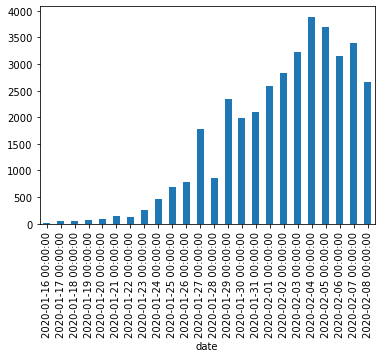

In [15]:
df.plot(kind='bar')

In [16]:
look_back=3
splitratio=1

In [17]:
df.tail()

date
2020-02-04    3892
2020-02-05    3697
2020-02-06    3151
2020-02-07    3401
2020-02-08    2657
Name: Inc_deter, dtype: int64

In [18]:
dataset1=np.log(df.values)

In [19]:
#if look_back==1:
dataset1=dataset1.reshape(-1,1)

In [20]:
dataset1

array([[1.38629436],
       [4.06044301],
       [4.07753744],
       [4.34380542],
       [4.53259949],
       [5.00394631],
       [4.87519732],
       [5.55682806],
       [6.12468339],
       [6.5482191 ],
       [6.65415252],
       [7.48099216],
       [6.75925527],
       [7.75705114],
       [7.59337419],
       [7.6501687 ],
       [7.85941315],
       [7.94697136],
       [8.08116578],
       [8.26667844],
       [8.21527696],
       [8.05547514],
       [8.13182479],
       [7.88495295]])

In [21]:
sc= MinMaxScaler(feature_range=(0,1))
dataset = sc.fit_transform(dataset1)


In [22]:
dataset

array([[0.        ],
       [0.3886627 ],
       [0.39114722],
       [0.4298468 ],
       [0.45728626],
       [0.52579215],
       [0.50707968],
       [0.60614839],
       [0.68868089],
       [0.75023788],
       [0.76563432],
       [0.88580779],
       [0.78091003],
       [0.9259304 ],
       [0.90214147],
       [0.91039603],
       [0.94080777],
       [0.95353354],
       [0.97303745],
       [1.        ],
       [0.99252927],
       [0.96930356],
       [0.98040027],
       [0.94451974]])

In [23]:
# split into train and test sets
train_size = int(len(dataset) * splitratio)
test_size = train_size 
train, test = dataset[0:train_size,:], dataset[0:train_size,:]
print(train.shape, test.shape)


(24, 1) (24, 1)


In [24]:
train_size

24

In [25]:
# reshape into X=t and Y=t+1
 #   look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
all_X,all_Y=create_dataset(dataset,look_back)


In [26]:
trainX

array([[0.        , 0.3886627 , 0.39114722],
       [0.3886627 , 0.39114722, 0.4298468 ],
       [0.39114722, 0.4298468 , 0.45728626],
       [0.4298468 , 0.45728626, 0.52579215],
       [0.45728626, 0.52579215, 0.50707968],
       [0.52579215, 0.50707968, 0.60614839],
       [0.50707968, 0.60614839, 0.68868089],
       [0.60614839, 0.68868089, 0.75023788],
       [0.68868089, 0.75023788, 0.76563432],
       [0.75023788, 0.76563432, 0.88580779],
       [0.76563432, 0.88580779, 0.78091003],
       [0.88580779, 0.78091003, 0.9259304 ],
       [0.78091003, 0.9259304 , 0.90214147],
       [0.9259304 , 0.90214147, 0.91039603],
       [0.90214147, 0.91039603, 0.94080777],
       [0.91039603, 0.94080777, 0.95353354],
       [0.94080777, 0.95353354, 0.97303745],
       [0.95353354, 0.97303745, 1.        ],
       [0.97303745, 1.        , 0.99252927],
       [1.        , 0.99252927, 0.96930356],
       [0.99252927, 0.96930356, 0.98040027]])

In [27]:
trainY

array([0.4298468 , 0.45728626, 0.52579215, 0.50707968, 0.60614839,
       0.68868089, 0.75023788, 0.76563432, 0.88580779, 0.78091003,
       0.9259304 , 0.90214147, 0.91039603, 0.94080777, 0.95353354,
       0.97303745, 1.        , 0.99252927, 0.96930356, 0.98040027,
       0.94451974])

In [28]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
all_X = np.reshape(all_X, (all_X.shape[0], 1, all_X.shape[1]))

In [29]:
trainX

array([[[0.        , 0.3886627 , 0.39114722]],

       [[0.3886627 , 0.39114722, 0.4298468 ]],

       [[0.39114722, 0.4298468 , 0.45728626]],

       [[0.4298468 , 0.45728626, 0.52579215]],

       [[0.45728626, 0.52579215, 0.50707968]],

       [[0.52579215, 0.50707968, 0.60614839]],

       [[0.50707968, 0.60614839, 0.68868089]],

       [[0.60614839, 0.68868089, 0.75023788]],

       [[0.68868089, 0.75023788, 0.76563432]],

       [[0.75023788, 0.76563432, 0.88580779]],

       [[0.76563432, 0.88580779, 0.78091003]],

       [[0.88580779, 0.78091003, 0.9259304 ]],

       [[0.78091003, 0.9259304 , 0.90214147]],

       [[0.9259304 , 0.90214147, 0.91039603]],

       [[0.90214147, 0.91039603, 0.94080777]],

       [[0.91039603, 0.94080777, 0.95353354]],

       [[0.94080777, 0.95353354, 0.97303745]],

       [[0.95353354, 0.97303745, 1.        ]],

       [[0.97303745, 1.        , 0.99252927]],

       [[1.        , 0.99252927, 0.96930356]],

       [[0.99252927, 0.96930356, 0.98040

In [30]:
print(trainX.shape, testX.shape)

(21, 1, 3) (21, 1, 3)


In [31]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=130, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=30))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

W0209 11:58:33.585304 15784 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0209 11:58:34.556283 15784 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0209 11:58:34.937251 15784 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0209 11:58:37.439876 15784 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0209 11:58:37.461864 15784 deprecation.py:506

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 130)            94120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 130)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                19320     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 124,271
Trainable params: 124,271
Non-trainable params: 0
_________________________________________________________________
None

In [32]:
history=model.fit(trainX, trainY, epochs=200, batch_size=2, validation_split=0.1,verbose=2)  #validation_split=0.05,

W0209 11:58:39.484322 15784 deprecation.py:323] From C:\Users\Changbing Yang\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0209 11:58:42.577618 15784 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 18 samples, validate on 3 samples
Epoch 1/200
 - 8s - loss: 0.6092 - val_loss: 0.8206
Epoch 2/200
 - 0s - loss: 0.5114 - val_loss: 0.6576
Epoch 3/200
 - 0s - loss: 0.3759 - val_loss: 0.4010
Epoch 4/200
 - 0s - loss: 0.1755 - val_loss: 0.1009
Epoch 5/200
 - 0s - loss: 0.0288 - val_loss: 0.0171
Epoch 6/200
 - 0s - loss: 0.0253 - val_loss: 0.0200
Epoch 7/200
 - 0s - loss: 0.0089 - val_loss: 0.0016
Epoch 8/200
 - 0s - loss: 0.0084 - val_loss: 0.0041
Epoch 9/200
 - 0s - loss: 0.0076 - val_loss: 1.8984e-04
Epoch 10/200
 - 0s - loss: 0.0087 - val_loss: 2.0135e-04
Epoch 11/200
 - 0s - loss: 0.0068 - val_loss: 1.9779e-04
Epoch 12/200
 - 0s - loss: 0.0066 - val_loss: 2.1156e-04
Epoch 13/200
 - 0s - loss: 0.0047 - val_loss: 1.9547e-04
Epoch 14/200
 - 0s - loss: 0.0048 - val_loss: 3.1680e-04
Epoch 15/200
 - 0s - loss: 0.0062 - val_loss: 9.0429e-04
Epoch 16/200
 - 0s - loss: 0.0059 - val_loss: 5.7916e-04
Epoch 17/200
 - 0s - loss: 0.0099 - val_loss: 0.0016
Epoch 18/200
 - 0s - loss: 0.0081

Epoch 150/200
 - 0s - loss: 0.0044 - val_loss: 0.0037
Epoch 151/200
 - 0s - loss: 0.0031 - val_loss: 1.7671e-04
Epoch 152/200
 - 0s - loss: 0.0038 - val_loss: 7.5050e-04
Epoch 153/200
 - 0s - loss: 0.0039 - val_loss: 0.0017
Epoch 154/200
 - 0s - loss: 0.0024 - val_loss: 0.0015
Epoch 155/200
 - 0s - loss: 0.0040 - val_loss: 0.0014
Epoch 156/200
 - 0s - loss: 0.0029 - val_loss: 0.0016
Epoch 157/200
 - 0s - loss: 0.0041 - val_loss: 0.0032
Epoch 158/200
 - 0s - loss: 0.0045 - val_loss: 0.0013
Epoch 159/200
 - 0s - loss: 0.0035 - val_loss: 0.0014
Epoch 160/200
 - 0s - loss: 0.0034 - val_loss: 0.0033
Epoch 161/200
 - 0s - loss: 0.0038 - val_loss: 0.0026
Epoch 162/200
 - 0s - loss: 0.0036 - val_loss: 5.0386e-04
Epoch 163/200
 - 0s - loss: 0.0052 - val_loss: 0.0021
Epoch 164/200
 - 0s - loss: 0.0040 - val_loss: 5.4462e-04
Epoch 165/200
 - 0s - loss: 0.0053 - val_loss: 0.0020
Epoch 166/200
 - 0s - loss: 0.0030 - val_loss: 0.0015
Epoch 167/200
 - 0s - loss: 0.0027 - val_loss: 0.0021
Epoch 168/20

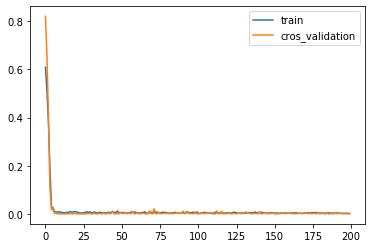

In [33]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='cros_validation')
plt.legend()
plt.show()

In [34]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [35]:
trainPredict.shape

(21, 1)

In [36]:
trainY.shape

(21,)

In [37]:
y1=trainPredict.reshape(trainPredict.shape[0])

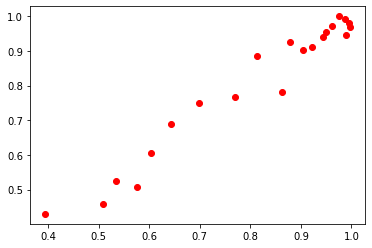

In [38]:
plt.plot(y1,trainY,'ro')

In [39]:
# invert predictions
#trainPred = sc.inverse_transform(trainPredict)

In [40]:
# invert predictions
trainPredict = sc.inverse_transform(trainPredict)
trainY = sc.inverse_transform([trainY])
testPredict = sc.inverse_transform(testPredict)
testY = sc.inverse_transform([testY])
# calculate root mean squared error
trainScore = sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.27 RMSE
Test Score: 0.27 RMSE


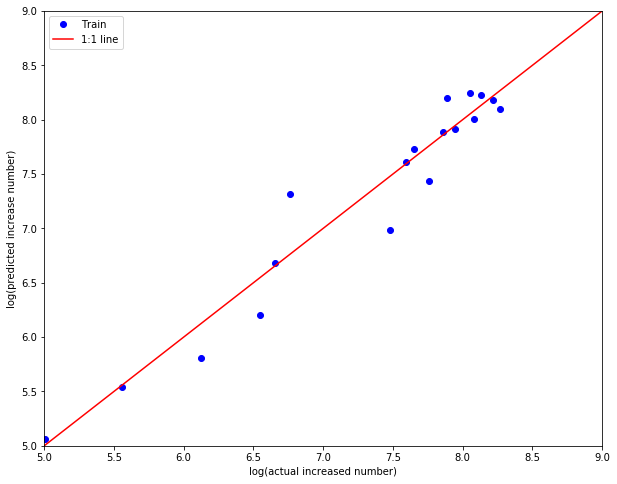

In [41]:
# plot baseline and predictions
fig = plt.figure(figsize=(10, 8))
plt.plot(trainY[0,:],trainPredict[:,0],'bo',label='Train')
#plt.plot(testY[0,:],testPredict[:,0],'y^',label='Test')
upperb=np.amax([np.amax(trainPredict[:,0]),np.amax(testPredict[:,0])])
lowera=np.amin([np.amin(trainPredict[:,0]),np.amin(testPredict[:,0])])
plt.plot([0,10],[0,10],'r-',label='1:1 line')
#plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
plt.ylim(5,9)
plt.xlim(5,9)

plt.ylabel('log(predicted increase number)')
plt.xlabel('log(actual increased number)')    
    
    #plt.xlim(5000,1000000)
#plt.ylim(5000,1000000)


plt.legend()
plt.show()

In [42]:
def recover_to_time_series(Yhat,initime):
    
    nperiod=len(Yhat)
    date=pd.period_range(initime,periods=nperiod,freq='D')
    print(len(date),len(Yhat[:,0]))
    y=pd.DataFrame({'date':date,'predicted':Yhat[:,0]})
    y=y.reset_index(drop=True).set_index('date')
    
    return y
    
    

21 21


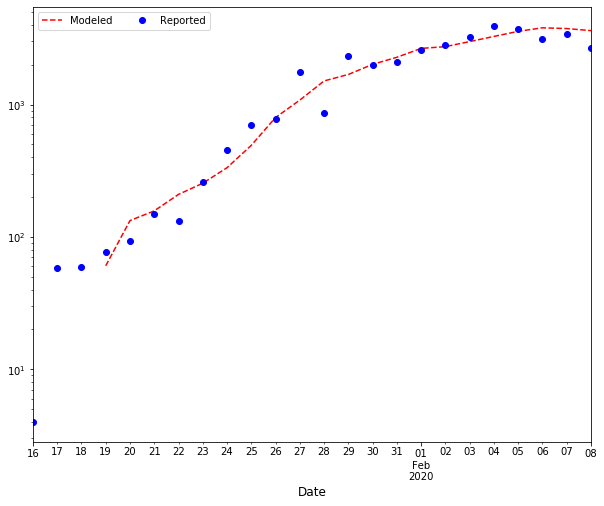

In [43]:
initime=df.index[look_back]
predict_new=recover_to_time_series(trainPredict,initime)
predict_new['predicted']=np.exp(predict_new['predicted'])
fig = plt.figure(figsize=(10, 8))
predict_new['predicted'].plot(color='r',style='--',label='Modeled',legend=True)
df.plot(color='b',linestyle='',marker='o',label='Reported',legend=True)

#plt.title(paralabel)
#plt.ylabel(paralabel,fontsize=12)
#plt.xlim('2018-01-01','2019-01-01')
plt.yscale('log')

#plt.yscale('log')
plt.xlabel('Date',fontsize=12)
plt.legend(loc='best',ncol=3)
plt.show()    


#### using the data at the three dates (2-6,2-7, and 2-8) to Predict increased determined cases in 2-9

In [44]:
# convert an array of values into a dataset matrix
def create_dataset_pr(dataset, look_back=1):
    dataX = []
    for i in range(len(dataset)-look_back+1): #-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        print(a)
    return np.array(dataX)


In [45]:
def prediction (pred,model):
    dataset1=np.log(pred['Inc_deter'].values)
    dataset2=dataset1.reshape(-1,1)
    sc1= MinMaxScaler(feature_range=(0,1))
    dataset3 = sc.fit_transform(dataset2)
    pred_X = create_dataset_pr(dataset3, look_back)
    pred_X = np.reshape(pred_X, (pred_X.shape[0], 1, pred_X.shape[1]))
    Pred_Y = model.predict(pred_X)
    Pred_Y = sc.inverse_transform(Pred_Y)
    return np.exp(Pred_Y)

file='predict0208.csv'
pred=pd.read_csv(file)
pr0208=prediction(pred,model)

pr0208

In [46]:
file='predict0209.csv'
pred=pd.read_csv(file)
pr0209=prediction(pred,model)
pr0209

[0.69073166 1.         0.        ]


array([[3152.1936]], dtype=float32)